In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [39]:
data=pd.read_csv('/content/vgsales.csv')
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [41]:
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [42]:
data.shape

(16598, 11)

In [43]:
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [44]:
data.dropna(inplace=True)

In [45]:
data.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [46]:
data_cat=data.select_dtypes(include='object')
data_cat.head()

,Name,Platform,Genre,Publisher
0,Wii Sports,Wii,Sports,Nintendo
1,Super Mario Bros.,NES,Platform,Nintendo
2,Mario Kart Wii,Wii,Racing,Nintendo
3,Wii Sports Resort,Wii,Sports,Nintendo
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo


In [47]:
from sklearn.preprocessing import OrdinalEncoder
# define ordinal encoding
encoder = OrdinalEncoder()
# transform data
data_ord = encoder.fit_transform(data_cat)
print(data_ord)

[[1.0849e+04 2.6000e+01 1.0000e+01 3.5900e+02]
 [9.2010e+03 1.1000e+01 4.0000e+00 3.5900e+02]
 [5.4930e+03 2.6000e+01 6.0000e+00 3.5900e+02]
 ...
 [8.0390e+03 1.6000e+01 6.0000e+00 2.1000e+01]
 [4.9380e+03 4.0000e+00 5.0000e+00 8.0000e+00]
 [8.8500e+03 6.0000e+00 4.0000e+00 5.4400e+02]]


In [48]:
# Create the dataframe
data_ord = pd.DataFrame(data_ord,columns=['Name', 'Platform','Genre','Publisher'])

In [49]:
data_ord.head()

,Name,Platform,Genre,Publisher
0,10849.0,26.0,10.0,359.0
1,9201.0,11.0,4.0,359.0
2,5493.0,26.0,6.0,359.0
3,10851.0,26.0,10.0,359.0
4,7247.0,5.0,7.0,359.0


In [50]:
data.drop({'Name','Platform','Genre','Publisher'},inplace=True,axis=1)

In [51]:
data.isnull().sum()

Rank            0
Year            0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [65]:
data.head(1)

,Rank,Year,NA_Sales,EU_Sales,Global_Sales,Name,Platform,Genre,Publisher
0,1.0,2006.0,41.49,29.02,82.74,10849.0,26.0,10.0,359.0


In [76]:
def plot():
  x=data.Year
  y= data.Global_Sales
  plt.plot(x,y)
  plt.show();

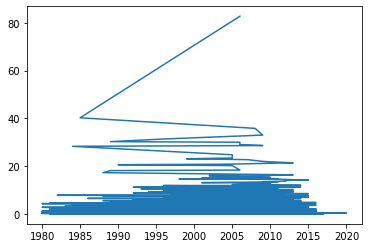

In [77]:
plot()

**In 2005-2006, there has been a major rise in sales**

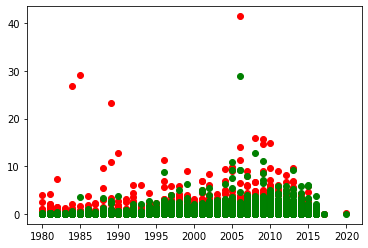

In [71]:
x=data.Year
y1=data.NA_Sales
y2=data.EU_Sales
plt.scatter(x,y1,c='r')
plt.scatter(x,y2,c='g')
plt.show()

In [52]:
data=pd.concat([data,data_ord],axis='columns')

In [53]:
data.head()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Name,Platform,Genre,Publisher
0,1.0,2006.0,41.49,29.02,3.77,8.46,82.74,10849.0,26.0,10.0,359.0
1,2.0,1985.0,29.08,3.58,6.81,0.77,40.24,9201.0,11.0,4.0,359.0
2,3.0,2008.0,15.85,12.88,3.79,3.31,35.82,5493.0,26.0,6.0,359.0
3,4.0,2009.0,15.75,11.01,3.28,2.96,33.00,10851.0,26.0,10.0,359.0
4,5.0,1996.0,11.27,8.89,10.22,1.00,31.37,7247.0,5.0,7.0,359.0


In [54]:
data.drop({'Other_Sales','JP_Sales'},axis=1,inplace=True)
data.head()

,Rank,Year,NA_Sales,EU_Sales,Global_Sales,Name,Platform,Genre,Publisher
0,1.0,2006.0,41.49,29.02,82.74,10849.0,26.0,10.0,359.0
1,2.0,1985.0,29.08,3.58,40.24,9201.0,11.0,4.0,359.0
2,3.0,2008.0,15.85,12.88,35.82,5493.0,26.0,6.0,359.0
3,4.0,2009.0,15.75,11.01,33.00,10851.0,26.0,10.0,359.0
4,5.0,1996.0,11.27,8.89,31.37,7247.0,5.0,7.0,359.0


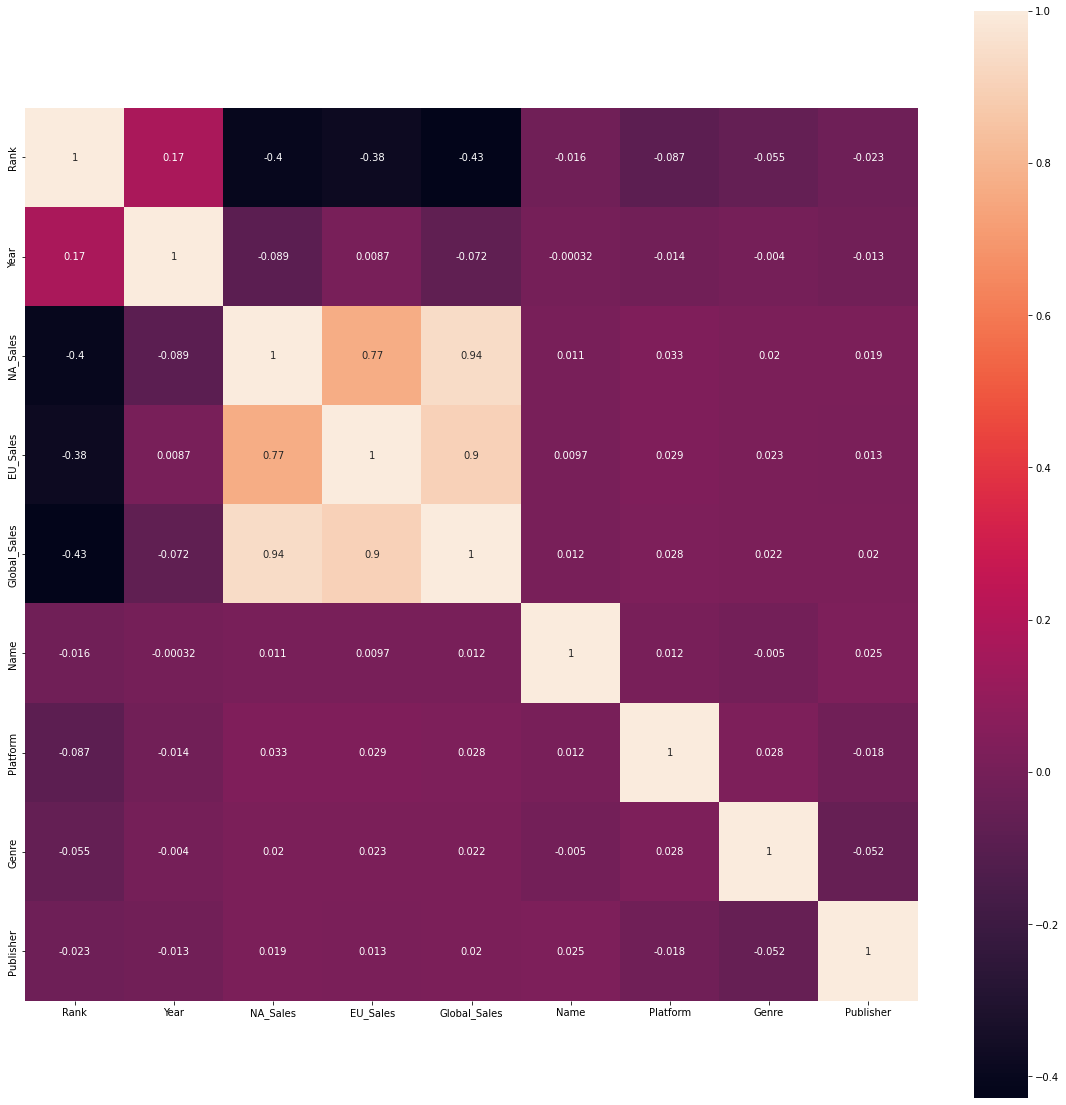

In [64]:
corr=data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,square=True)

In [55]:
data.shape

(16589, 9)

In [56]:
data.dropna(inplace=True)

In [57]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(data, test_size=0.25)

In [58]:
trainx=train.drop(['Global_Sales'],axis=1)
trainy=train['Global_Sales']

val_x=val.drop(['Global_Sales'],axis=1)
val_y=val['Global_Sales']


In [59]:
trainx.isnull().sum()

Rank         0
Year         0
NA_Sales     0
EU_Sales     0
Name         0
Platform     0
Genre        0
Publisher    0
dtype: int64

In [60]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(trainx,trainy)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
df_pred=lr.predict(val_x)


In [62]:
print("The model's metrics values are: ")
print("Accuracy: ", lr.score(val_x,val_y))
print("Mean Absolute Error: ",mean_absolute_error(df_pred , val_y))
print("Mean Squared Error: " ,mean_squared_error(df_pred,val_y))
print("R-squared score: ", r2_score(val_y,df_pred))

The model's metrics values are: 
Accuracy:  0.9469086204180707
Mean Absolute Error:  0.12280741829089117
Mean Squared Error:  0.09864225050934904
R-squared score:  0.9469086204180707
